# Importing Necessary Libraries

In [14]:
# Importing necessary libraries for machine learning and data preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



# Data Exploration and Preprocessing

In [15]:
data = pd.read_csv("data.csv")
labels = data['Heart Disease']
data = data.drop('Heart Disease', axis=1)

In [16]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 27.5 KB


In [18]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


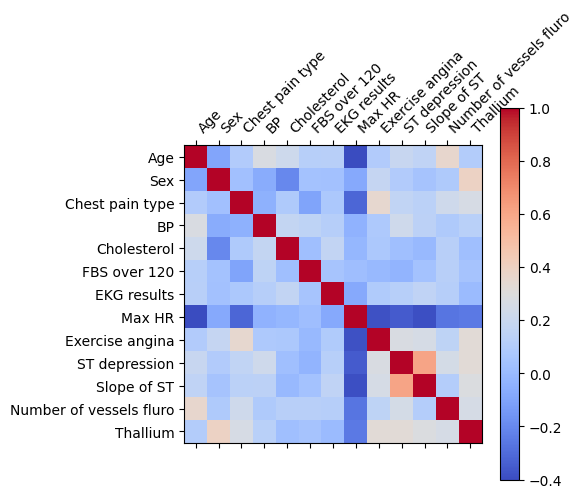

In [19]:
corr_matrix = data.corr()
plt.matshow(corr_matrix, cmap='coolwarm')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns,rotation=45, ha='left')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.show()

# Data Splitting and Feature Scaling


In [20]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [21]:
# feature scaling

std_scl = StandardScaler()
std_scl.fit(X_train)

X_train = std_scl.transform(X_train)
X_test = std_scl.transform(X_test)

# Model Training and Evaluation

Classification Report:
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Accuracy Score: 0.9074074074074074


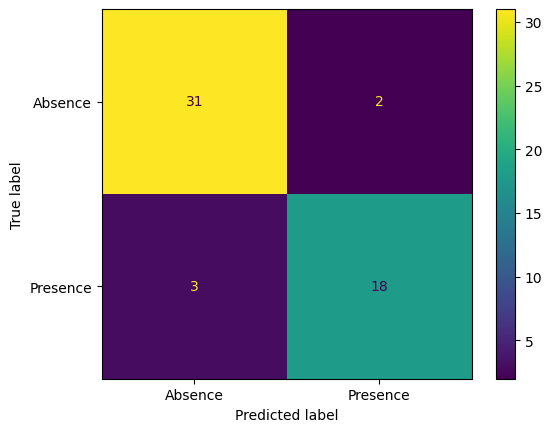

In [22]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
score = log_reg.score(X_test, y_test)

y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot()

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)
print('Accuracy Score:', score)


Classification Report:
              precision    recall  f1-score   support

     Absence       0.89      0.94      0.91        33
    Presence       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54

Accuracy Score: 0.8888888888888888


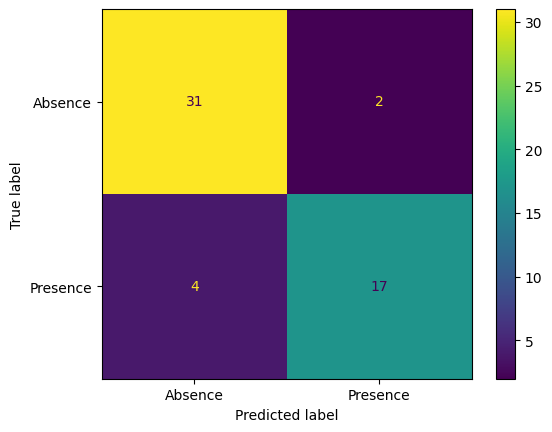

In [23]:
# support vector classifier

svc_clf = SVC()
svc_clf.fit(X_train, y_train)
score = svc_clf.score(X_test, y_test)

y_pred = svc_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=svc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svc_clf.classes_)
disp.plot()

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)
print('Accuracy Score:', score)

Classification Report:
              precision    recall  f1-score   support

     Absence       0.82      0.97      0.89        33
    Presence       0.93      0.67      0.78        21

    accuracy                           0.85        54
   macro avg       0.88      0.82      0.83        54
weighted avg       0.86      0.85      0.85        54

Accuracy Score: 0.8518518518518519


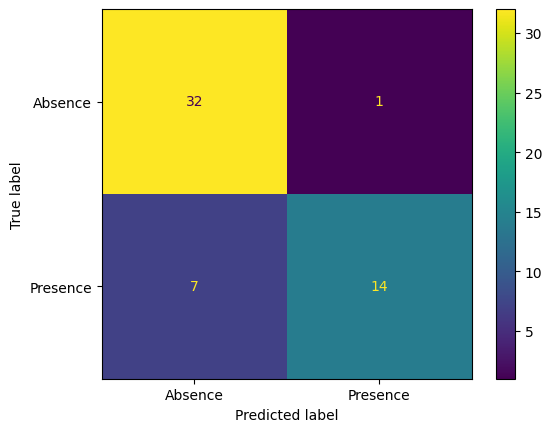

In [24]:
# random forest classifier

rdm_forest = RandomForestClassifier(max_depth=4)

rdm_forest.fit(X_train, y_train)
score = rdm_forest.score(X_test, y_test)
y_pred = rdm_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=rdm_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rdm_forest.classes_)
disp.plot()
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)
print('Accuracy Score:', score)
